#Model  : IMAGE CLASSIFICATION Create CNN Model Using Transfer Learning using Vgg 16

In [15]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'perfect_images\Train'
valid_path = 'perfect_images\Test'

In [22]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [23]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [24]:
 # useful for getting number of classes
folders = glob('perfect_images\Train/*')

In [25]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('perfect_images\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('perfect_images\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

 

Found 245 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [32]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HIGHTE~1\AppData\Local\Temp/ipykernel_10460/708679198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
8/8 [==============================] - 49s 6s/step - loss: 1.2841 - accuracy: 0.7184 - val_loss: 1.3968 - val_accuracy: 0.5161
Epoch 2/5
8/8 [==============================] - 46s 6s/step - loss: 0.6416 - accuracy: 0.7265 - val_loss: 2.0982 - val_accuracy: 0.5161
Epoch 3/5
8/8 [==============================] - 45s 6s/step - loss: 0.4462 - accuracy: 0.8408 - val_loss: 0.5706 - val_accuracy: 0.8065
Epoch 4/5
8/8 [==============================] - 48s 6s/step - loss: 0.2287 - accuracy: 0.9143 - val_loss: 0.9997 - val_accuracy: 0.6452
Epoch 5/5
8/8 [==============================] - 45s 6s/step - loss: 0.1709 - accuracy: 0.9388 - val_loss: 0.9124 - val_accuracy: 0.7097


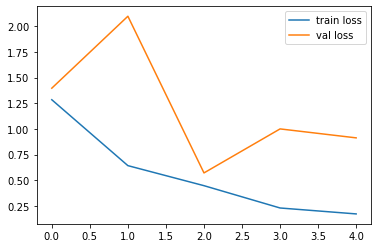

<Figure size 432x288 with 0 Axes>

In [34]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

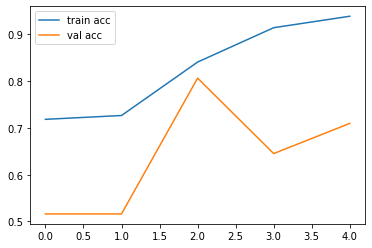

<Figure size 432x288 with 0 Axes>

In [35]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')